In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
%cd /content/drive/MyDrive/10714
%cd /content/drive/MyDrive/10714/hw3
!pip3 install pybind11
!sudo apt-get install opencl-headers -y

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/10714
/content/drive/MyDrive/10714/hw3
     |████████████████████████████████| 208 kB 5.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  opencl-clhpp-headers
Suggested packages:
  opencl-clhpp-headers-doc
The following NEW packages will be installed:
  opencl-clhpp-headers opencl-headers
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 60.9 kB of archives.
After this operation, 640 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 opencl-clhpp-headers all 2.0.10+git12-g5dd8bb9-1 [58.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 opencl-headers all 2.2~2018.02.21-gb5c3680-1 [2,728 B]
Fetched 60.9 kB in 1s (89.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is inst

In [46]:
!make

-- Found pybind11: /usr/local/lib/python3.7/dist-packages/pybind11/include (found version "2.8.1" )
-- Found OpenCL (2.2), building OpenCL backend
-- OpenCL Include Dirs: /usr/include
-- OpenCL Libraries: /usr/lib/x86_64-linux-gnu/libOpenCL.so
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/My Drive/10714/project/final_project/build
make[1]: Entering directory '/content/drive/My Drive/10714/project/final_project/build'
make[2]: Entering directory '/content/drive/My Drive/10714/project/final_project/build'
make[3]: Entering directory '/content/drive/My Drive/10714/project/final_project/build'
Scanning dependencies of target ndarray_backend_opencl
make[3]: Leaving directory '/content/drive/My Drive/10714/project/final_project/build'
make[3]: Entering directory '/content/drive/My Drive/10714/project/final_project/build'
[-25%] Building CXX object CMakeFiles/ndarray_backend_opencl.dir/src/ndarray_backend_opencl.cc.o
[  0%] Linking CXX shared modul

In [2]:
%set_env PYTHONPATH ./python

env: PYTHONPATH=./python


In [2]:
import sys
sys.path.append('./python')

In [3]:
import needle as ndl

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
def time_binary(f, devices, shape, N):
  results = {str(device): np.empty(N) for device in devices}
  results['numpy'] = np.empty(N)
  for i in range(N):
    a = np.random.randn(*shape)
    b = np.random.randn(*shape)
    t = time.time()
    c = f(a, b)
    results['numpy'][i] = time.time() - t
    for device in devices:
      a_device = ndl.Tensor(a, device=device)
      b_device = ndl.Tensor(b, device=device)
      t = time.time()
      c_device = f(a_device, b_device)
      results[str(device)][i] = time.time() - t
  return results

In [15]:
a = ndl.Tensor([1, 2], device=ndl.nd_backend.OpenCLDevice())
b = ndl.Tensor([3, 4], device=ndl.nd_backend.OpenCLDevice())
c = a * b
c

needle.Tensor([3. 8.])

In [8]:
!mkdir figures

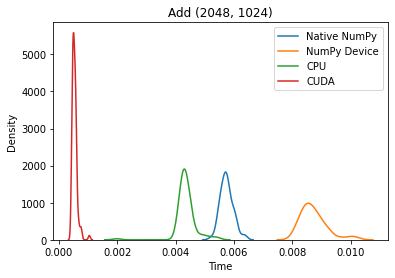

In [15]:
# results = time_binary(lambda a, b: a + b, [ndl.cpu(), ndl.numpy_device(), ndl.nd_backend.OpenCLDevice()], (64, 32), 1000)
results = time_binary(lambda a, b: a + b, [ndl.cpu(), ndl.numpy_device(), ndl.cuda()], (2048, 1024), 100)
sns.distplot(results['numpy'], hist=False, label='Native NumPy')
sns.distplot(results['numpy_device()'], hist=False, label='NumPy Device')
sns.distplot(results['cpu(0)'], hist=False, label='CPU')
# sns.distplot(results['opencl(0)'], hist=False, label='OpenCL')
sns.distplot(results['cuda(0)'], hist=False, label='CUDA')
plt.title('Add (2048, 1024)')
plt.xlabel('Time')
# plt.xlim(0.0, np.quantile(results['cpu(0)'], 0.95))
plt.legend()
plt.savefig('figures/add_cuda_large.png')

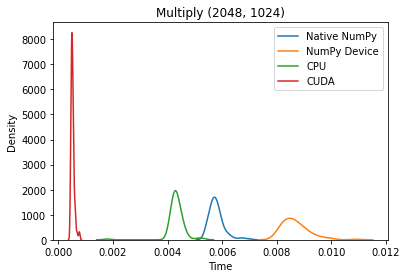

In [16]:
# results = time_binary(lambda a, b: a + b, [ndl.cpu(), ndl.numpy_device(), ndl.nd_backend.OpenCLDevice()], (64, 32), 1000)
results = time_binary(lambda a, b: a * b, [ndl.cpu(), ndl.numpy_device(), ndl.cuda()], (2048, 1024), 100)
sns.distplot(results['numpy'], hist=False, label='Native NumPy')
sns.distplot(results['numpy_device()'], hist=False, label='NumPy Device')
sns.distplot(results['cpu(0)'], hist=False, label='CPU')
# sns.distplot(results['opencl(0)'], hist=False, label='OpenCL')
sns.distplot(results['cuda(0)'], hist=False, label='CUDA')
plt.title('Multiply (2048, 1024)')
plt.xlabel('Time')
# plt.xlim(0.0, np.quantile(results['cpu(0)'], 0.95))
plt.legend()
plt.savefig('figures/multiply_cuda_large.png')